In [1]:
%load_ext autoreload

%autoreload 2

from pprint import pprint
from lucifex.fdm import FunctionSeries, GridSeries, ConstantSeries, NumericSeries
from lucifex.io import (find_datasets, DataSet, find_by_parameters, proxy, load_grid_series, 
    load_numeric_series, load_mesh, load_function_series, load_txt_dict)
from lucifex.viz import plot_line, plot_colormap
from lucifex.utils import nested_dict, as_index
from co2_pkg.post.plot import (
    plot_colormaps, plot_timeseries,
    plot_twinned_timeseries, plot_colormaps_mosaic,
)
from co2_pkg.post.grid_utils import spatial_average

ROOT = './data_reference/'
PARAMETERS = 'PARAMETERS.txt'
FUNCTION_SERIES = 'FunctionSeries.h5'
CONSTANT_SERIES = 'ConstantSeries.h5'
GRID_SERIES = 'GridSeries.npz'
NUMERIC_SERIES = 'NumericSeries.npz'
FIGURES = 'figures'


datasets = find_datasets(
    './data_reference/', 
    include='*',
    grids=[(i, 'GridSeries.npz') for i in ('c', 's', 'psi')],
    numerics=[(i, 'NumericSeries.npz') for i in ('mD', 'mC', 'f', 'uMinMax', 'dt')],
    parameter_file='PARAMETERS.txt',
)

Nx200_dataset = find_by_parameters(datasets, {'Nx': 200})
Nx250_dataset = find_by_parameters(datasets, {'Nx': 250})


In [ ]:
plot_line((Nx200_dataset['dt'].time_series, Nx200_dataset['dt'].series), x_lims=(0, 20))
plot_line((Nx250_dataset['dt'].time_series, Nx250_dataset['dt'].series), x_lims=(0, 20))

In [ ]:
plot_line((Nx200_dataset['dt'].time_series, Nx200_dataset['dt'].series), x_lims=(0, 20))
plot_line((Nx250_dataset['dt'].time_series, Nx250_dataset['dt'].series), x_lims=(0, 20))

In [35]:
c_200 = load_grid_series(use_cache=True)('c', directory_200, GRID_SERIES)
c_250 = load_grid_series(use_cache=True)('c', directory_250, GRID_SERIES)

In [ ]:
mD_200 = load_numeric_series(use_cache=True)('uMinMax', directory_200, NUMERIC_SERIES)

In [43]:
uMinMax_200 = load_numeric_series(use_cache=True)('uMinMax', directory_200, NUMERIC_SERIES)
uMin_200, uMax_200 = uMinMax_200.split()

uMinMax_250 = load_numeric_series(use_cache=True)('uMinMax', directory_250, NUMERIC_SERIES)
uMin_250, uMax_250 = uMinMax_250.split()

In [ ]:
f_200 = load_numeric_series(use_cache=True)('f', directory_200, NUMERIC_SERIES)
fInterface_200, *_, fMid200 = f_200.split()

f_250 = load_numeric_series(use_cache=True)('f', directory_250, NUMERIC_SERIES)
fInterface_250, *_, fMid250 = f_250.split()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

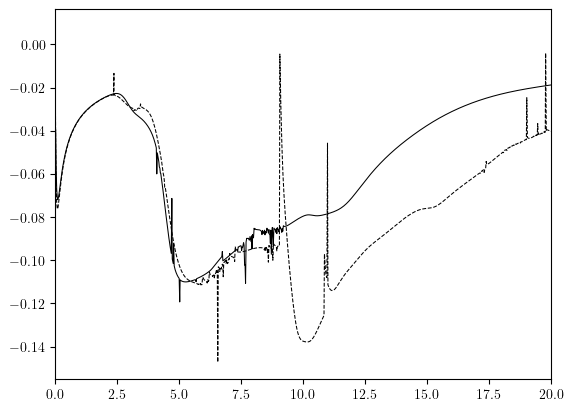

In [73]:
plot_line(
    [(fInterface_200.time_series, [i[0] - i[1] for i in fInterface_200.series]), 
     (fInterface_250.time_series, [i[0] - i[1] for i in fInterface_250.series])],
    x_lims=(0, 20))

In [30]:
dt_200 = load_numeric_series(use_cache=True)('dt', directory_200, NUMERIC_SERIES)
dt_250 = load_numeric_series(use_cache=True)('dt', directory_250, NUMERIC_SERIES)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

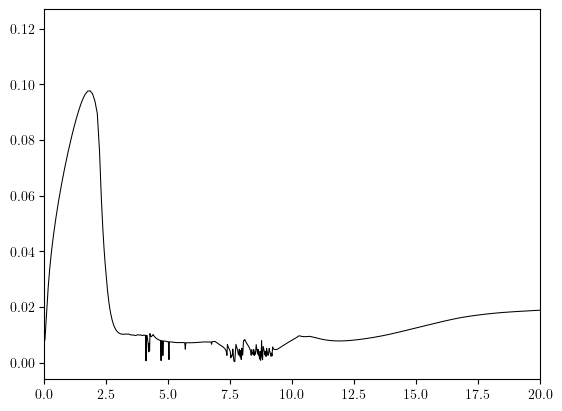

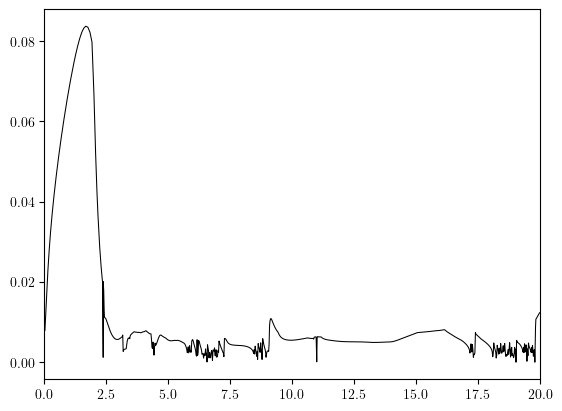

In [46]:
plot_line((dt_200.time_series, dt_200.series), x_lims=(0, 20))
plot_line((dt_250.time_series, dt_250.series), x_lims=(0, 20))

(<Figure size 640x480 with 1 Axes>, <Axes: >)

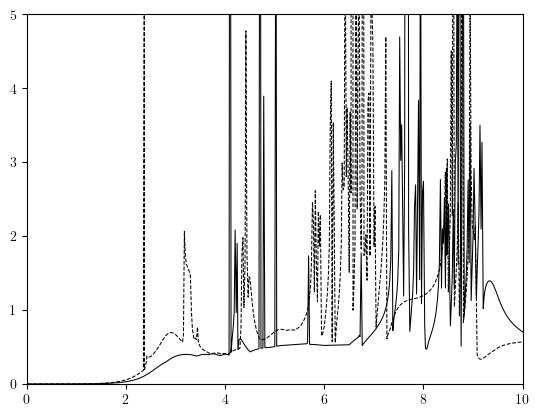

In [51]:
plot_line(
    [(uMax_200.time_series, uMax_200.series), (uMax_250.time_series, uMax_250.series)], 
    x_lims=(0, 10),
    y_lims=(0, 5),
)

In [39]:
len(c_200.series), len(c_250.series)

(3176, 1280)

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='$x$', ylabel='$y$'>)

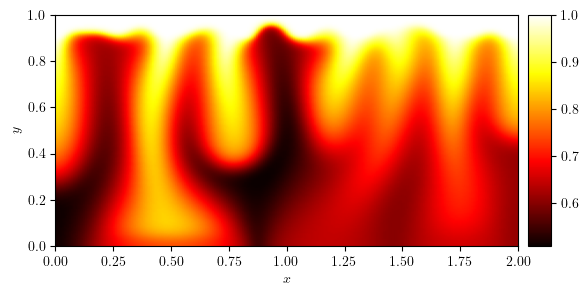

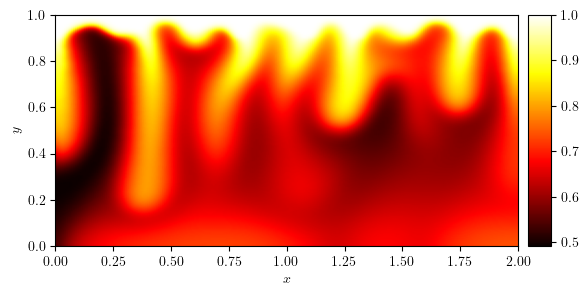

In [65]:
t_target = 26.0
series_index_200 = as_index(c_200.time_series, t_target)
series_index_250 = as_index(c_250.time_series, t_target)

plot_colormap((*c_200.axes, c_200.series[series_index_200]))
plot_colormap((*c_250.axes, c_250.series[series_index_250]))

In [64]:
max(c_250.time_series)

26.920092063409168